### <span style="color:#3c2f2f;font-size:0.65em; float:right; font-family:Times New Roman">KEYELA Patatchona, Нпммд-02-21</span>
## <span style="font-family:Times New Roman;float:left;"> Лабораторная работа № 1:  «Моделирование процессов восстановления»</span>



In [1]:
# Used libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.stats import gaussian_kde
from scipy import stats
from texttable import Texttable

from scipy.special import erf

ModuleNotFoundError: No module named 'pandas'

In [2]:
# In this work I will be using gamma-distribution
#with parameters k = 3 and theta = 2
shape, scale =  3., 2.

# Number of trajectories (N)
N = 100

# The trajectory length (T)
T = 1000

In [3]:
# Let's generate a set of random values with gamma distribution (shape = 3, scale=2)
Xi = np.random.gamma(shape,scale,10000000)

# Построение траекторий

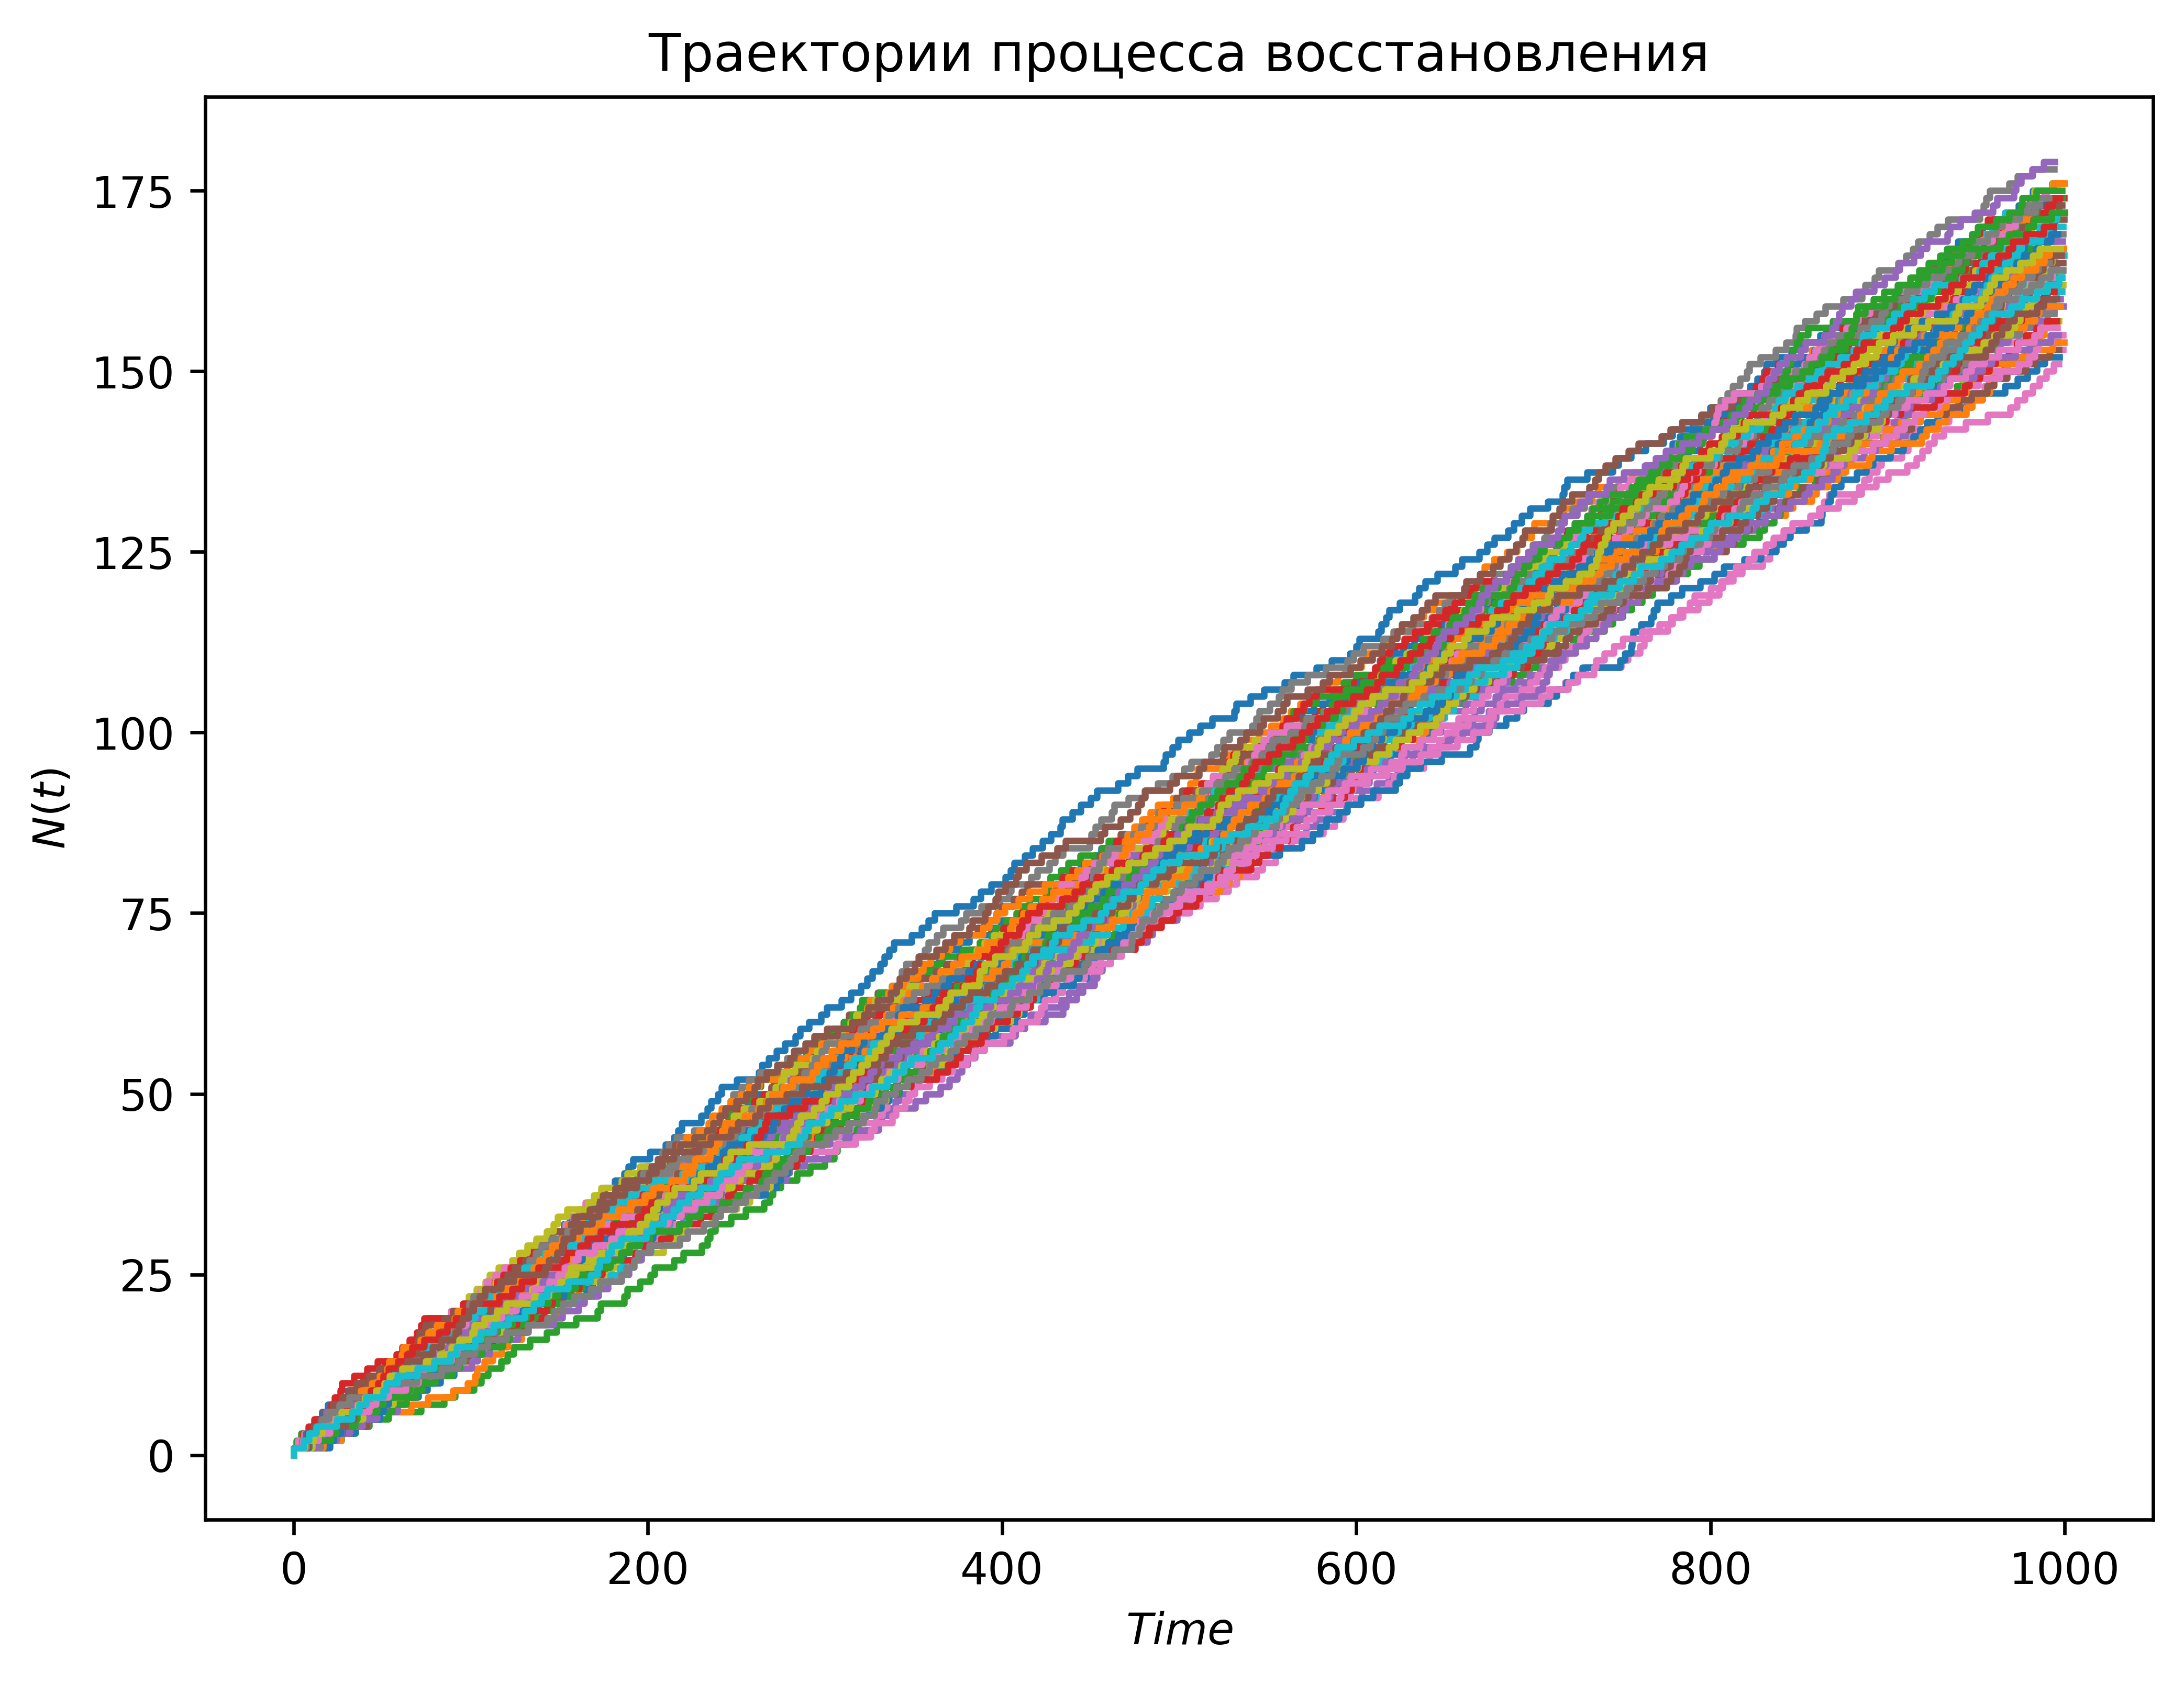

In [49]:
plt.figure(dpi=600,figsize=(8,6))
index = 0 # Индекс первый неисплолзованный элемент Xi для построенния посл-ти S0, S1, S2,.....
for i in range(N):
    S = [0] # Массив где будем сохранять последовательность S0,S1,S2,S3...
    si = Xi[index] # Текущее значение 
    while si <= T:
        S.append(si) # Добавляем S_i к последовательности
        index += 1
        si += Xi[index] # Считаем S_i+1  
    plt.step(S,np.arange(len(S))) # Строим текущую траекторию
                               # На оси ОХ  - S0, S1, S2, -- и на оси OY - Число восстановлений
plt.xlabel("$Time$")
plt.ylabel("$N(t)$")
plt.title("Траектории процесса восстановления")
#plt.savefig("Траектории.png")
plt.show()

# Закон больших чисел

$H(t) --> \frac{T}{\mu} \qquad$ $\hat H(t) --> \frac{1}{N}\sum n_i \qquad$ $\mu = k\theta = 6$

In [4]:
# Эта функция считает число восстановлений для заданных параметров
def number_recovries(Xi,T,N):
    Ni = [] # Число восстановлений для каждой траектории
    last_used_index = 0 # Последний исползованный элемент
    index = 0 # Индекс первый неисплолзованный элемент Xi для построенния посл-ти S0, S1, S2,.....
    for i in range(N):
        si = Xi[index] # Текущее значение
        while si <= T:
            index += 1
            si += Xi[index] # Считаем S_i+1  
        Ni.append(index-last_used_index) # добавляем к списку число скачков (восстановлений) для i-ой траектории
        last_used_index = index
    return np.array(Ni)

In [51]:
number_recovries(Xi,T,N)

array([175, 173, 164, 176, 163, 171, 166, 165, 176, 175, 174, 166, 166,
       167, 154, 170, 153, 163, 157, 168, 152, 167, 163, 174, 161, 167,
       159, 167, 169, 161, 159, 157, 154, 162, 167, 153, 163, 178, 166,
       161, 158, 176, 160, 174, 159, 165, 160, 169, 172, 166, 174, 154,
       174, 173, 160, 172, 155, 173, 166, 161, 162, 172, 172, 174, 162,
       161, 166, 158, 171, 161, 167, 159, 169, 161, 168, 173, 175, 174,
       164, 172, 170, 166, 172, 157, 155, 166, 156, 165, 162, 170, 169,
       167, 175, 170, 179, 160, 151, 164, 167, 163])

In [52]:
np.mean(number_recovries(Xi,T,N=1000))

165.977

## Проверка сходимости ЗБЧ

theor, estimation,      relative_error = 100 * module(theor - estimation) / theor

In [53]:
list_N, list_T = [100,1000],[T/2,T] # Здесь мы задаем разные числа траекторий и разные моменты времены
results = [["Parameters","H(t) theoritical","H(t) estimation","Absolute error","Relative error (%)"]]
for T_test in list_T:
    H_theor = T_test / (shape*scale) # Мы считаем теоритическое значение H(t)
    for N_test in list_N:
        H_est = np.mean(number_recovries(Xi,T_test,N_test)) # Считаем оценку величины H(t)
        results.append(["N = {0}, T = {1}".format(N_test,T_test),
                        "{:.3f}".format(H_theor),"{:.3f}".format(H_est),
                        "{:.3f}".format(abs(H_est-H_theor)),"{:.2f}".format(100*abs(H_est-H_theor)/H_theor)])

results_table = Texttable()
results_table.add_rows(results)
print(results_table.draw())

+---------------+---------------+---------------+---------------+--------------+
|  Parameters   |     H(t)      |     H(t)      |   Absolute    |   Relative   |
|               |  theoritical  |  estimation   |     error     |  error (%)   |
+===============+===============+===============+===============+==============+
| N = 100, T =  | 83.333        | 82.270        | 1.063         | 1.280        |
| 500.0         |               |               |               |              |
+---------------+---------------+---------------+---------------+--------------+
| N = 1000, T = | 83.333        | 82.605        | 0.728         | 0.870        |
| 500.0         |               |               |               |              |
+---------------+---------------+---------------+---------------+--------------+
| N = 100, T =  | 166.667       | 165.680       | 0.987         | 0.590        |
| 1000          |               |               |               |              |
+---------------+-----------

# Центральная предельная теорема

In [5]:
# Эта функция считает дисперсию числа восстановления
def variance(Ni,tj):
    return np.mean((Ni - (tj/(shape*scale)))**2) # mu = shape*scale    

In [6]:
# Считаем значения Zi
def zi (Ni,tj):
    return (Ni - (tj/(shape*scale))) / np.sqrt(variance(Ni,tj))

In [7]:
#ПЛОТНОСТЬ СТАНДАРТНОГО НОРМАЛЬНОГО РАСП.
def stand_pdf(x):
    return np.exp((-x**2)/2) / np.sqrt(2*np.pi)

In [8]:
#фУНКЦИЯ РАСПРЕД СТАНДАРТНОГО НОРМАЛЬНОГО РАСП.
def stand_cdf(x):
    return (1 + erf(x/np.sqrt(2)))/2

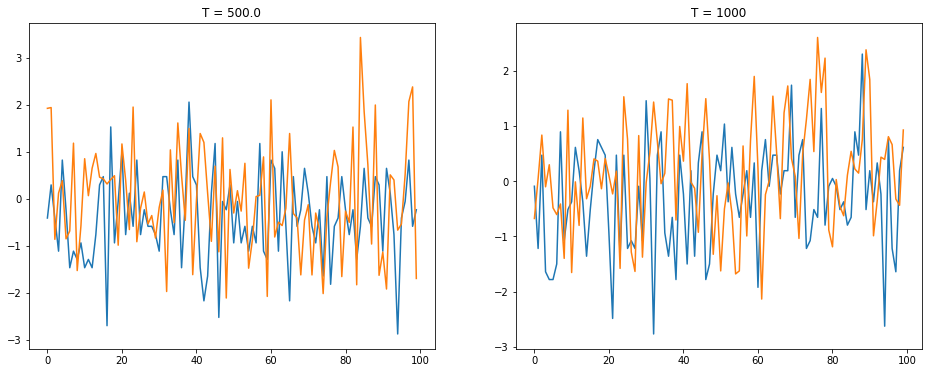

In [9]:
fig, ax = plt.subplots(1,2,figsize=(16,6))
tj = [T/2,T]
for i in [0,1]:
    ax[i].plot(range(100),zi(number_recovries(Xi,tj[i],N=100),tj[i]),label="Zi при N = 100")
    ax[i].plot(range(100),np.random.normal(size=100),label="Standart normal")
    ax[i].set_title(f'T = {tj[i]}')
plt.savefig("Zi_stand_normal.png")
plt.show()

## Гистограмы

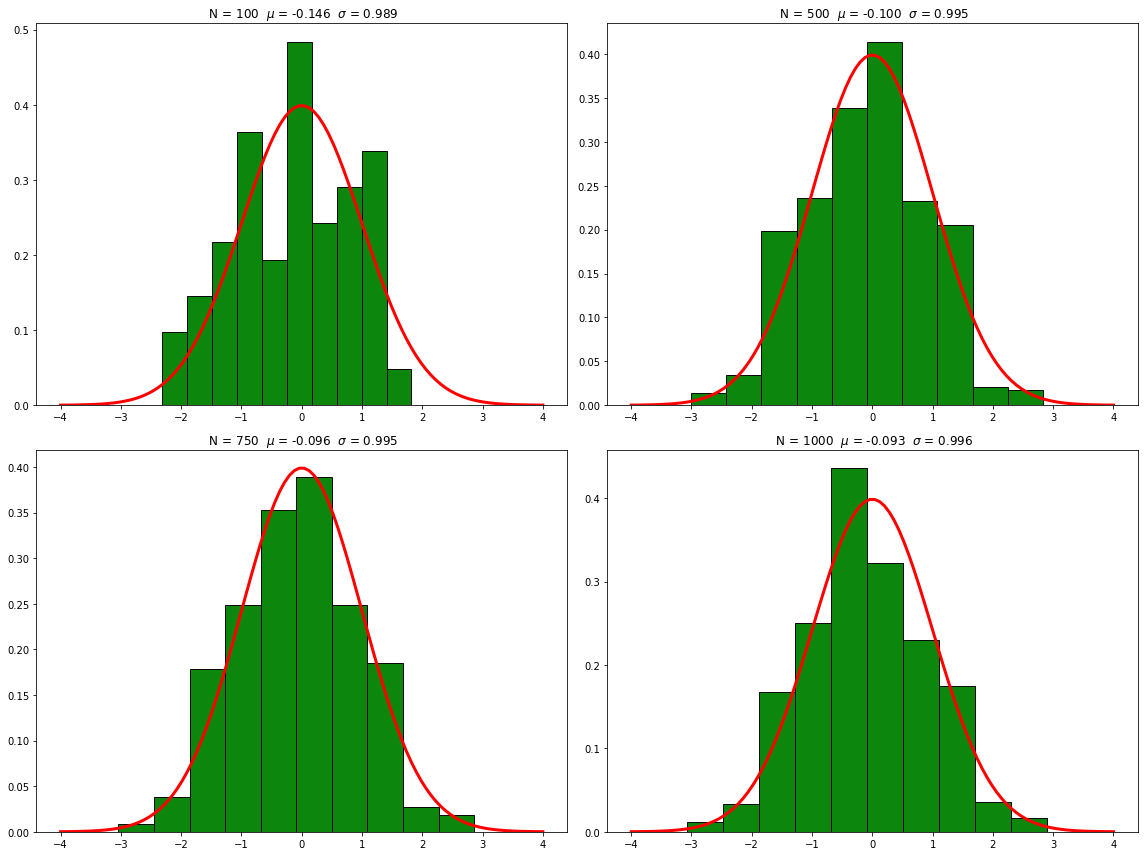

In [59]:
fig, ax = plt.subplots(2,2,figsize=(16,12))
xx = np.linspace(-4,4,100)
N_test = np.array([[100,500],[750,1000]])
for ii in range(N_test.shape[0]):
    for jj in range(N_test.shape[1]):
        Zi = zi(number_recovries(Xi,T,N_test[ii,jj]),T)
        Zi.sort()
        mu, sigma = np.mean(Zi), np.sqrt(np.var(Zi))
        ax[ii,jj].plot(xx,stand_pdf(xx),color="red",linewidth=3)
        counts,bins,_ = ax[ii,jj].hist(Zi,bins=10,alpha=0.95, facecolor="g",density=True,edgecolor='black')
        ax[ii,jj].set_title(' N = {0}  $\mu$ = {1:.3f}  $\sigma$ = {2:.3f}'.format(N_test[ii,jj],mu,sigma))
fig.tight_layout()
plt.savefig("Histograms from gamma sample.png")
plt.show()

## Тест Колмогорова

## Вручную

In [10]:
def ks_stats(alpha,n):
    return np.sqrt(np.log(2/alpha) / (2*n)) - 1 / (6*n)

In [17]:
ks_stats(0.05,10)

0.4128027416800709

In [18]:

list_N, list_T = [100,1000],[T/2,T] 
for T_test in list_T:
    for N_test in list_N:
        Zi = zi(number_recovries(Xi,T_test,N_test),T_test)
        Zi.sort()
        n = len(Zi)
        F_emp_minus = np.arange(n)/n
        F_emp_plus = np.arange(1,n+1)/n
        F_theor = stand_cdf(Zi)

        D_obs = np.max([F_theor-F_emp_minus,F_emp_plus-F_theor])
        D_theor = ks_stats(0.05,10)
        
        print(f'D_obs = {D_obs} D_theor = {D_theor}')
                
        print("При N = %d   и Т = %d :"%(N_test,T_test))
        if D_obs <= D_theor:
            print("   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%\n")
        else:
            print("   Отвергается гипотеза H0,  о том что распределение Zi является стандартно-нормальным на уровне 5%\n")

D_obs = 0.22296241533731687 D_theor = 0.4128027416800709
При N = 100   и Т = 500 :
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%

D_obs = 0.10138977097712287 D_theor = 0.4128027416800709
При N = 1000   и Т = 500 :
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%

D_obs = 0.14954107673442263 D_theor = 0.4128027416800709
При N = 100   и Т = 1000 :
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%

D_obs = 0.05926885118913028 D_theor = 0.4128027416800709
При N = 1000   и Т = 1000 :
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%



## Встроенной функцией

In [20]:
from scipy.stats import kstest

In [21]:
list_N, list_T = [100,1000],[T/2,T] 
for T_test in list_T:
    for N_test in list_N:
        Zi = zi(number_recovries(Xi,T_test,N_test),T_test)
        Zi.sort()
        tstats, pvalue = kstest(Zi,stand_cdf)
        print("При N = %d   и Т = %d   pvalue = %.6f:"%(N_test,T_test,pvalue))
        if tstats <= ks_stats(0.05,10):
            print("   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%\n")
        else:
            print("   Отвергается гипотеза H0,  о том что распределение Zi является стандартно-нормальным на уровне 5%\n")

При N = 100   и Т = 500   pvalue = 0.000076:
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%

При N = 1000   и Т = 500   pvalue = 0.000000:
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%

При N = 100   и Т = 1000   pvalue = 0.020403:
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%

При N = 1000   и Т = 1000   pvalue = 0.001702:
   Принимается гипотеза H0, о том что распределение Zi является стандартно-нормальным с вер. 95%



# Часть 2: Нахождение исходного распределения

## Самая длиная траектория при $ N = 100$ и $ T = 1000 $

In [18]:
S, Ni = [], []
last_used_index, index = 0, 0
for i in range(N):
    Ti = [0]
    si = Xi[index]
    while si <= T:
        Ti.append(si)
        index += 1
        si += Xi[index]
        
    Ni.append(index-last_used_index)
    S.append(np.array(Ti))
    
    last_used_index = index

In [19]:
S[np.argmax(Ni)]

array([  0.        ,   6.842081  ,  10.13985605,  16.47023144,
        23.45250749,  28.17197812,  30.1991346 ,  32.85759217,
        36.34924722,  44.98757451,  52.79703403,  58.51374381,
        65.32521304,  76.73012766,  89.59328205,  95.10683732,
        97.0099252 , 101.35213734, 107.90943967, 110.30785597,
       120.66347241, 123.18948342, 132.80982227, 139.23532075,
       140.21035285, 140.68001064, 146.34844061, 151.63710969,
       156.29225158, 161.53640525, 167.45941576, 170.81488764,
       179.28529107, 194.12371292, 203.69432982, 205.65724997,
       211.53555611, 220.95849255, 229.28515706, 234.94196082,
       240.44457765, 241.65478311, 245.36285613, 252.74793351,
       258.53632781, 262.29865365, 277.39011179, 289.45976723,
       297.92280969, 298.96941138, 308.55445375, 310.77537031,
       313.29989479, 315.25992511, 321.20340773, 323.73785824,
       329.75682079, 331.56226724, 336.75793411, 341.20224716,
       348.49499265, 352.66941138, 360.32717817, 363.35

In [20]:
# Save data as a numpy array
#np.save('.npy',S[np.argmax(Ni)])

# to load that we use the function load
#data = np.load('data_traj_sample.npy')

## Полученные данные от напарника

In [22]:
unknown_data = np.load('patachona.npy')

In [23]:
unknown_Xi = []
for i in range(1,len(unknown_data)):
    unknown_Xi.append(unknown_data[i] - unknown_data[i-1])

In [34]:
len(unknown_Xi)

1340

In [35]:
max(unknown_data)

1999.1206787056763

In [25]:
unknown_Xi.sort()
unknown_Xi_density = gaussian_kde(unknown_Xi).evaluate(unknown_Xi)

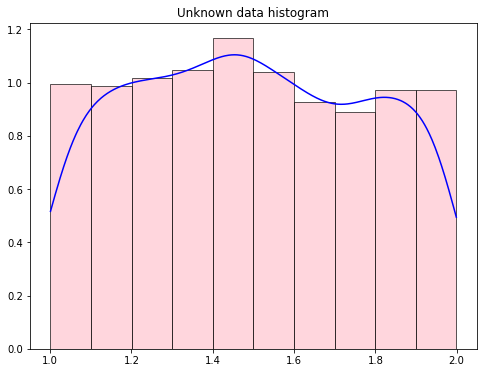

In [26]:
plt.figure(figsize=(8,6))
counts,bins,patches = plt.hist(unknown_Xi,bins=10,color='pink',alpha=0.65,edgecolor='black',density=True)
plt.plot(unknown_Xi,unknown_Xi_density,color='b')
plt.title('Unknown data histogram')
plt.savefig("Unknown data.png")
plt.show()

In [25]:
?kstest

In [27]:
data_mu = np.mean(unknown_Xi)
data_var = np.var(unknown_Xi)
print(f'Mean : {data_mu} Variance : {data_var}')

Mean : 1.4929952790931114 Variance : 0.08184230971960553


# Гипотезы на возможные распределения выборки 
*Полученные данные имеют:*
1. Гамма распределение
2. Weibull распределение
3. Бета распределение
4. Хи распределение
5. Равномерное распределение
Зная мат ожид и дисперсию сможем найти параметры этих распределений, если бы выборка им принадлежит. Дальше будем протестировать гипотезы используя критерия согласия Колмогорова и Пирсона.

## В нашем случае почти без сомнения, мы можем утверждать что, придоставленные данные взяты из равномерного распределения на отрезке $[1,2]$

Если Х ~ Uni[a,b] то 
$$a = MX - \sqrt(3 * DX)$$
$$b = MX + \sqrt(3 * DX)$$

In [28]:
#Оценки параметров a и b
a_est = data_mu - np.sqrt(3*data_var)
b_est = data_mu + np.sqrt(3*data_var)
print(f'a_est : {a_est} b_est : {b_est}')

a_est : 0.9974885393217773 b_est : 1.9885020188644456


## Наши предположение на величины a, b подверждаются. Значит, если выборка из равномерного распределения, то a = 1, b=2 

## Kolmogorov test

### H0 : Полученные данные имеют равномерное распределение на $[1,2]$

In [81]:
uniform_cdf = lambda x : x-1
def normal_cdf(x, mu = data_mu, sigma = np.sqrt(data_var)):
    return (1 + erf((x-mu)/(sigma*np.sqrt(2))))/2
def gamma_cdf (x,alpha = (data_mu**2)/data_var,loc=1,scale=data_var/data_mu):
    return stats.gamma.cdf(x,alpha,loc,scale)

In [79]:
stats.gamma.cdf(4,a=2,loc=1,scale=2)

0.4421745996289252

In [82]:
dtr_cdf = [uniform_cdf,normal_cdf,gamma_cdf]
names = ["равномерное","нормальное","гамма"]
for cdf,name in zip(dtr_cdf,names):
    data_stat, data_pvalue = kstest(unknown_Xi,cdf)
    if data_stat <= ks_stats(0.05,len(unknown_Xi)):
        print(f"Принимается гипотеза H0, о том что полученные данные имеют {name} распределение")
    else:
        print(f"Отвергается гипотеза Н0 о том что полученные данные имеют {name} распределение")

Принимается гипотеза H0, о том что полученные данные имеют равномерное распределение
Отвергается гипотеза Н0 о том что полученные данные имеют нормальное распределение
Отвергается гипотеза Н0 о том что полученные данные имеют гамма распределение


## Pearson test

In [46]:
def pearsontest(X,cdf):
    k = int(1 + 3.322 * np.log10(len(X)))
    intervals = np.linspace(min(X), max(X),k+1)
    
    p_exp = []
    for i in range(len(intervals)-1):
        p_exp.append( cdf(intervals[i+1]) - cdf(intervals[i]))
    p_exp = np.array(p_exp)
    
    p_obs = []
    lower_border = 0
    for i in range(1,len(intervals)):
        upper_border = np.sum(X<=intervals[i])
        p_obs.append((upper_border - lower_border)/len(X))
        lower_border = upper_border
    p_obs = np.array(p_obs)
    
    data_stat = len(X) * np.sum((p_obs - p_exp)**2 / p_exp)
    
    return data_stat

In [47]:
pearsontest(unknown_Xi,uniform_cdf)

4.977000305165047

In [83]:
dtr_cdf = [uniform_cdf,normal_cdf,gamma_cdf]
names = ["равномерное","нормальное","гамма"]
for cdf,name in zip(dtr_cdf,names):
    data_stat = pearsontest(unknown_Xi,cdf)
    if data_stat <= 18.3:
        print(f"Принимается гипотеза H0, о том что полученные данные имеют {name} распределение")
    else:
        print(f"Отвергается гипотеза Н0 о том что полученные данные имеют {name} распределение")

Принимается гипотеза H0, о том что полученные данные имеют равномерное распределение
Отвергается гипотеза Н0 о том что полученные данные имеют нормальное распределение
Отвергается гипотеза Н0 о том что полученные данные имеют гамма распределение


## По таблице $\chi^2(\alpha = 0.05,10) = 18.3.\qquad 4.98< 18.3$, значит мы принимаем гипотезу Н0, о том, что полученные данные равномерно распределены на отрезке $[1,2]$

In [185]:
# This is the pvalue > 0.05  ===> We accept the hypothesis H0
1-stats.chi2.cdf(data_stat, 10)

0.9041875962651987